In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

data = np.loadtxt('ValPreparedData\\np_signals.txt')
labels = np.loadtxt('ValPreparedData\\np_lables.txt')

In [2]:
data.shape

(809, 2000)

In [4]:
labels = keras.utils.to_categorical(labels, num_classes=6)
labels.shape

(809, 6)

In [5]:
print(labels[labels.argmax(axis=1) == 0].sum())
print(labels[labels.argmax(axis=1) == 1].sum())
print(labels[labels.argmax(axis=1) == 2].sum())
print(labels[labels.argmax(axis=1) == 3].sum())
print(labels[labels.argmax(axis=1) == 4].sum())
print(labels[labels.argmax(axis=1) == 5].sum())

127.0
137.0
131.0
129.0
132.0
153.0


In [7]:
from Classes.NeuralNetwork import Network
networks = list()
networks.append(Network('NeuralNetwork\model_1.hdf5'))
networks.append(Network('NeuralNetwork\model_2.hdf5'))
networks.append(Network('NeuralNetwork\model_3.hdf5'))
networks.append(Network('NeuralNetwork\model_4.hdf5'))
networks.append(Network('NeuralNetwork\model_5.hdf5'))
networks.append(Network('NeuralNetwork\model_6.hdf5'))
networks.append(Network('NeuralNetwork\model_7.hdf5'))
networks.append(Network('NeuralNetwork\model_8.hdf5'))

In [18]:
y_pred_conf_1 = networks[0].model.predict(data).argmax(axis=1)
y_pred_conf_2 = networks[1].model.predict(data).argmax(axis=1)
y_pred_conf_3 = networks[2].model.predict(data).argmax(axis=1)
y_pred_conf_4 = networks[3].model.predict(data).argmax(axis=1)
y_pred_conf_5 = networks[4].model.predict(data).argmax(axis=1)
y_pred_conf_6 = networks[5].model.predict(data).argmax(axis=1)
y_pred_conf_7 = networks[6].model.predict(data).argmax(axis=1)
y_pred_conf_8 = networks[7].model.predict(data).argmax(axis=1)

In [19]:
y_test_conf = labels.argmax(axis=1)

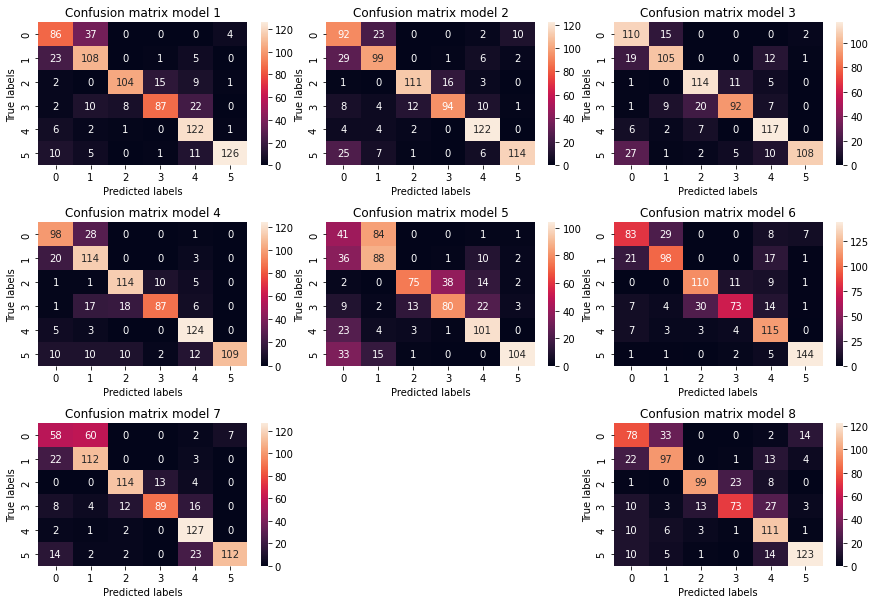

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)
ax5 = plt.subplot(3,3,5)
ax6 = plt.subplot(3,3,6)
ax7 = plt.subplot(3,3,7)
ax8 = plt.subplot(3,3,9)

sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_1), annot=True, fmt='g', ax=ax1)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_2), annot=True, fmt='g', ax=ax2)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_3), annot=True, fmt='g', ax=ax3)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_4), annot=True, fmt='g', ax=ax4)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_5), annot=True, fmt='g', ax=ax5)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_6), annot=True, fmt='g', ax=ax6)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_7), annot=True, fmt='g', ax=ax7)
sb.heatmap(confusion_matrix(y_test_conf, y_pred_conf_8), annot=True, fmt='g', ax=ax8)

ax1.set_title('Confusion matrix model 1')
ax2.set_title('Confusion matrix model 2')
ax3.set_title('Confusion matrix model 3')
ax4.set_title('Confusion matrix model 4')
ax5.set_title('Confusion matrix model 5')
ax6.set_title('Confusion matrix model 6')
ax7.set_title('Confusion matrix model 7')
ax8.set_title('Confusion matrix model 8')

ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax3.set_xlabel('Predicted labels')
ax3.set_ylabel('True labels')
ax4.set_xlabel('Predicted labels')
ax4.set_ylabel('True labels')
ax5.set_xlabel('Predicted labels')
ax5.set_ylabel('True labels')
ax6.set_xlabel('Predicted labels')
ax6.set_ylabel('True labels')
ax7.set_xlabel('Predicted labels')
ax7.set_ylabel('True labels')
ax8.set_xlabel('Predicted labels')
ax8.set_ylabel('True labels')

fig.subplots_adjust(wspace=0.1, hspace=0.4)
plt.savefig('matrixes.png')

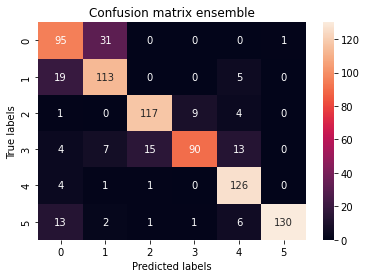

In [46]:
ensemble_pred = np.zeros(data.shape[0], dtype=int)
for i in range(data.shape[0]):
    pred = np.zeros(8, dtype=int)
    pred[0] = y_pred_conf_1[i]
    pred[1] = y_pred_conf_2[i]
    pred[2] = y_pred_conf_3[i]
    pred[3] = y_pred_conf_4[i]
    pred[4] = y_pred_conf_5[i]
    pred[5] = y_pred_conf_6[i]
    pred[6] = y_pred_conf_7[i]
    pred[7] = y_pred_conf_8[i]
    pred_classes = np.zeros(6, dtype=int)
    pred_classes[0] = len(pred[pred == 0])
    pred_classes[1] = len(pred[pred == 1])
    pred_classes[2] = len(pred[pred == 2])
    pred_classes[3] = len(pred[pred == 3])
    pred_classes[4] = len(pred[pred == 4])
    pred_classes[5] = len(pred[pred == 5])
    ensemble_pred[i] = pred_classes.argmax()
# ensemble_pred
ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test_conf, ensemble_pred), annot=True, fmt='g', ax=ax)
ax.set_title('Confusion matrix ensemble')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.savefig('ensemble.png')

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_conf, ensemble_pred))
print(accuracy_score(y_test_conf, y_pred_conf_1))
print(accuracy_score(y_test_conf, y_pred_conf_2))
print(accuracy_score(y_test_conf, y_pred_conf_3))
print(accuracy_score(y_test_conf, y_pred_conf_4))
print(accuracy_score(y_test_conf, y_pred_conf_5))
print(accuracy_score(y_test_conf, y_pred_conf_6))
print(accuracy_score(y_test_conf, y_pred_conf_7))
print(accuracy_score(y_test_conf, y_pred_conf_8))

0.8294190358467244
0.7824474660074165
0.7812113720642769
0.7985166872682324
0.7985166872682324
0.6044499381953028
0.7700865265760197
0.7564894932014833
0.7181705809641533
